Проанализировав этот датасет, можно ответить на вопрос от каких параметров зависит цена жилья на Airbnb, судя по имеющимся данным?

In [62]:
import pandas as pd  #импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
ab = pd.read_csv('AB_NYC_2019.csv', index_col=0)
ab.dropna()  #удаление пустых значений
ab.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [22]:
dropped_ab = ab.drop(columns=['name', 'host_id', 'host_name',
                              'latitude', 'longitude', 'last_review', 'reviews_per_month']) 
#удаляем столбцы, которые не будем использовать в анализе

Самым первым можно посмотреть, как зависит цена от группы района жилья(neighbourhood_group). Наглядно это можно показать на гистограмме.

In [23]:
ab.neighbourhood_group.value_counts()
#названия районов, встречающихся в таблице, и их количество

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [5]:
ab1 = ab[ab.neighbourhood_group == 'Manhattan']
p1 = ab1.price.mean()  #расчет средней цены для конкретного района

In [6]:
ab2 = ab[ab.neighbourhood_group == 'Brooklyn']
p2 = ab2.price.mean()

In [7]:
ab3 = ab[ab.neighbourhood_group == 'Queens']
p3 = ab3.price.mean()

In [8]:
ab4 = ab[ab.neighbourhood_group == 'Staten Island']
p4 = ab4.price.mean()

In [9]:
ab5 = ab[ab.neighbourhood_group == 'Bronx']
p5 = ab5.price.mean()

In [10]:
x = np.array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'])
y = np.array([p1, p2, p3, p4, p5])

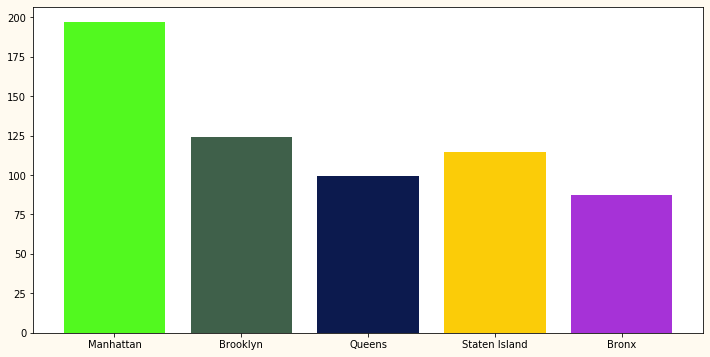

In [11]:
fig, ax = plt.subplots()  #построение гистограммы с помощью matplotlib
color_rectangle = np.random.rand(7, 3)    # RGB
ax.bar(x, y, color=color_rectangle)
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    #ширина столбцов
fig.set_figheight(6)    #высота столбцов

plt.show()

Видно, что наиболее высокие цены в районе Manhattan

Теперь посмотрим, влияет ли тип жилья на цену. 

In [21]:
dropped_ab[['price', 'room_type']]  #выделяем из dataframe 2 нужных столбца

,price,room_type
id,,
2539,149,Private room
2595,225,Entire home/apt
3647,150,Private room
3831,89,Entire home/apt
5022,80,Entire home/apt
...,...,...
36484665,70,Private room
36485057,40,Private room
36485431,115,Entire home/apt


In [14]:
a.room_type.value_counts()
#выводится список типов жилья и их количество в таблице

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [15]:
pr = ab[ab.room_type == 'Private room']
price_for_pr = pr.price.mean()

In [16]:
eh = ab[ab.room_type == 'Entire home/apt']
price_for_eh = eh.price.mean()

In [17]:
sr = ab[ab.room_type == 'Shared room']
price_for_sr = sr.price.mean()

In [18]:
d = {"room_type": np.array(['Private room', 'Entire home/apt', 'Shared room']),
     ...: "": np.array([price_for_pr, price_for_eh, price_for_sr])}
#вывод нового dataframe со средними значениями типов комнат
df = pd.DataFrame(d, index=['1', '2', '3'])
print(df)

         room_type            
1     Private room   89.780973
2  Entire home/apt  211.794246
3      Shared room   70.127586


Для типа Entire home/apt средняя цена самая высокая, и также превышает другие более, чем в 2 раза

На цену могут влиять и другие параметры. Рассмотрим их все вместе с помощью корреляции.

In [71]:
ab_drop = dropped_ab.drop(columns=['calculated_host_listings_count'])
#удаляем еще один ненужный столбец

In [79]:
def Encode(ab_drop):
#необходимо перевести столбцы, заполненные буквами в числовой вид
    for column in ab_drop.columns[ab_drop.columns.isin(['neighbourhood_group',
                                                        'room_type',
                                                        'neighbourhood'])]:
        ab_drop[column] = ab_drop[column].factorize()[0]
    return ab_drop

ab_drop_en = Encode(ab_drop.copy())

In [80]:
ab_drop_en  #как выглядит перевод в числовой вид

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
id,,,,,,,
2539,0,0,0,149,1,9,365
2595,1,1,1,225,1,45,355
3647,1,2,0,150,3,0,365
3831,0,3,1,89,1,270,194
5022,1,4,1,80,10,9,0
...,...,...,...,...,...,...,...
36484665,0,6,0,70,2,0,9
36485057,0,21,0,40,4,0,36
36485431,1,2,1,115,10,0,27


(7.0, 0.0)

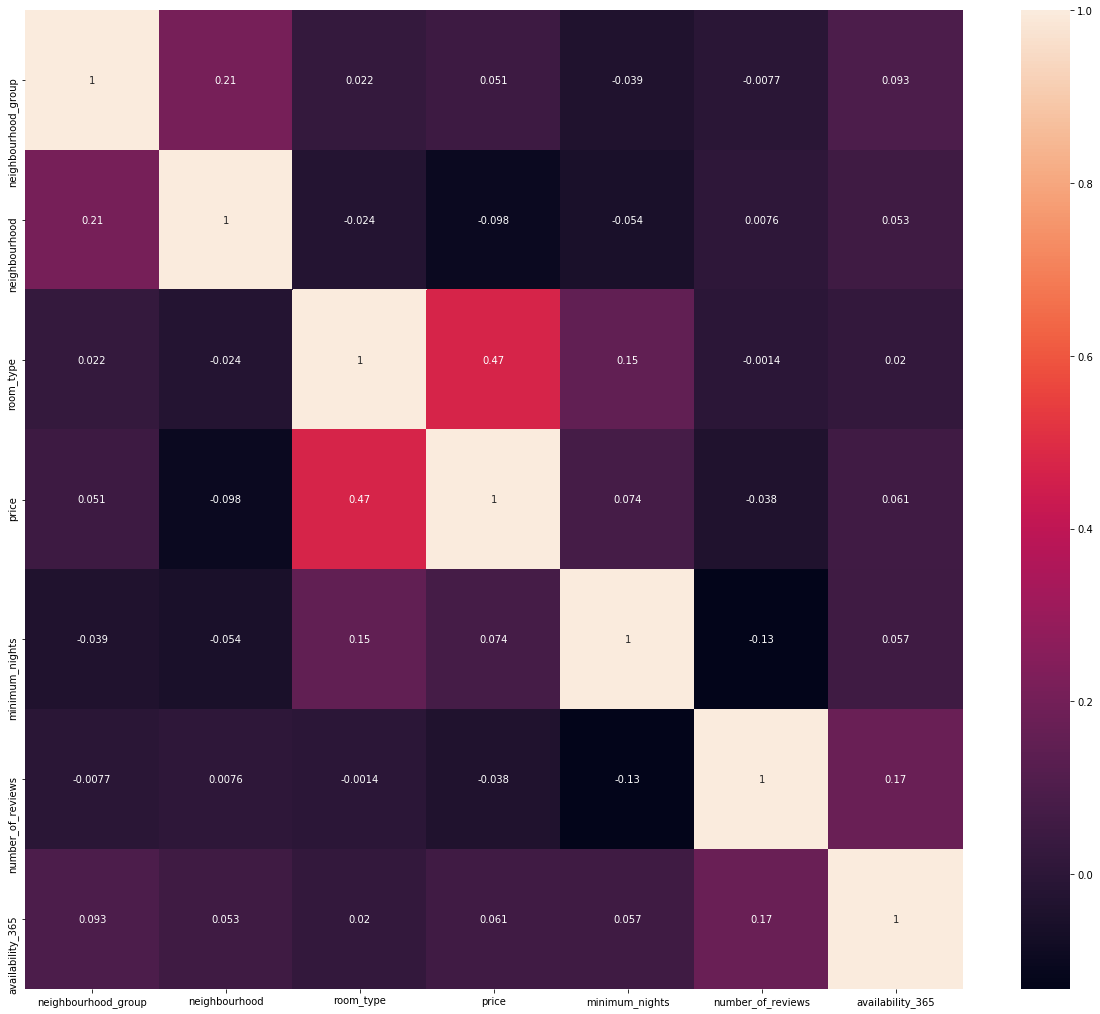

In [81]:
corr = ab_drop_en.corr(method='kendall')
plt.figure(figsize=(21, 18))
sns.heatmap(corr, annot=True)
b, t = plt.ylim()
b += 0.5  #в текущей версии matplotlib обрезается верхняя и нижняя строчки
t -= 0.5  #это нужно, что не обрезалось
plt.ylim(b, t)


Таким образом, видно, что наибольшая корреляция существует между ценой и типом жилья: 0,47. Наименьшая между ценой и количеством отзывов: -0,038. Исходя из анализа, наиболее значимыми факторами для цены являются тип жилья(room_type) и район расположения(neighbourhood_group).   